### 1.0.1 Imports

In [1]:
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

## 1.1 Data

In [2]:
CostShare_2014_2016 = pd.read_csv('data/2014-2016/BenefitsCostSharing.csv', low_memory = False)
CostShare_2014_2016.fillna(np.nan, inplace = True)

CostShare_2014_2016.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [3]:
CostShare_2017=pd.read_csv('data/2017-2019/Benefits_Cost_Sharing_PUF2017.csv',encoding = 'latin1',low_memory = False)
CostShare_2018=pd.read_csv('data/2017-2019/Benefits_Cost_Sharing_PUF2018.csv', encoding = 'latin1',low_memory = False)
CostShare_2019=pd.read_csv('data/2017-2019/Benefits_Cost_Sharing_PUF2019.csv', encoding = 'latin1',low_memory = False)

In [4]:
CostShare_2017.fillna(np.nan, inplace = True)
CostShare_2018.fillna(np.nan, inplace = True)
CostShare_2019.fillna(np.nan, inplace = True)

In [5]:
df_list = [CostShare_2014_2016, CostShare_2017, CostShare_2018, CostShare_2019]

CostShare_df = pd.concat(df_list, join = 'inner', sort = True)

In [6]:
CostShare_df.columns

Index(['BenefitName', 'BusinessYear', 'CoinsInnTier1', 'CoinsInnTier2',
       'CoinsOutofNet', 'CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet',
       'EHBVarReason', 'Exclusions', 'Explanation', 'ImportDate', 'IsCovered',
       'IsEHB', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP', 'IssuerId',
       'LimitQty', 'LimitUnit', 'PlanId', 'QuantLimitOnSvc', 'SourceName',
       'StandardComponentId', 'StateCode'],
      dtype='object')

In [ ]:
CostShare_df.loc[:,'IsCovered'] = CostShare_df.IsCovered.map({'Covered':1,
                                                              'Not Covered':0,
                                                              np.nan:0})

CostShare_df.loc[:,'QuantLimitOnSvc'] = CostShare_df.QuantLimitOnSvc.map({'Yes':1,
                                                                          'No':0,
                                                                          np.nan:0})

CostShare_df.loc[:,'CoinsInnTier1'] = CostShare_df.CoinsInnTier1.map({'50%': 50,
                                                           '0%': 0,
                                                           'No Charge after deductible': 0,
                                                           '20% Coinsurance after deductible':20,
                                                           '30% Coinsurance after deductible':30,
                                                           '50% Coinsurance after deductible':50,
                                                           '10% Coinsurance after deductible':10, 
                                                           'No Charge':0, 
                                                           '$0':0, 
                                                           '20%':20,
                                                           '10%':10,
                                                           '30%':30, 
                                                           '15% Coinsurance after deductible':15,
                                                           '40% Coinsurance after deductible':40,
                                                           '0% Coinsurance after deductible':0, 
                                                           '40%':40, 
                                                           '55%':55, 
                                                           'Not Applicable':0,
                                                           '71%':71, 
                                                           '54%':54, 
                                                           '70%':70, 
                                                           '54.00%':54,
                                                           '50.00%':50, 
                                                           '40.00%':40,
                                                           '50.00% Coinsurance after deductible':50,
                                                           '71.00%':71,
                                                           '70.00%':70,
                                                           '55.00%':50,
                                                           '65.00%':65, 
                                                           '32.00%':32,
                                                           '30.00% Coinsurance after deductible':30,
                                                           '0.00%':0,
                                                           '10.00% Coinsurance after deductible':10,
                                                           '5.00% Coinsurance after deductible':5,
                                                           '0.00% Coinsurance after deductible':0,
                                                           '35.00%':35,
                                                           '37.00%':37})

CostShare_df.loc[:,'CoinsInnTier1'] = CostShare_df.CoinsInnTier1.astype('float')

In [9]:
print('Total records:',CostShare_df.shape[0])
print('Unique benefits:',CostShare_df.BenefitName.nunique())
print('Unique Plan IDs:',CostShare_df.PlanId.nunique())
print('Unique Issuer IDs:',CostShare_df.IssuerId.nunique())

Total records: 8213853
Unique benefits: 984
Unique Plan IDs: 71905
Unique Issuer IDs: 978


In [10]:
CostShare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213853 entries, 0 to 1011517
Data columns (total 24 columns):
BenefitName            object
BusinessYear           int64
CoinsInnTier1          float64
CoinsInnTier2          object
CoinsOutofNet          object
CopayInnTier1          object
CopayInnTier2          object
CopayOutofNet          object
EHBVarReason           object
Exclusions             object
Explanation            object
ImportDate             object
IsCovered              float64
IsEHB                  object
IsExclFromInnMOOP      object
IsExclFromOonMOOP      object
IssuerId               int64
LimitQty               float64
LimitUnit              object
PlanId                 object
QuantLimitOnSvc        float64
SourceName             object
StandardComponentId    object
StateCode              object
dtypes: float64(4), int64(2), object(18)
memory usage: 1.5+ GB


In [11]:
CostShare_df[['BusinessYear','BenefitName']].groupby('BusinessYear').describe()

BenefitName                                         
                   count unique                        top   freq
BusinessYear                                                     
2014             1164869    496  Major Dental Care - Child  18719
2015             2079286    517        Orthodontia - Adult  31269
2016             1804253    429        Orthodontia - Adult  27389
2017             1324275    281        Orthodontia - Adult  21371
2018              829652    252        Orthodontia - Child  13857
2019             1011518    244  Major Dental Care - Adult  16399

# 2 EDA

In [34]:
#CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")

In [13]:
Unique_State = CostShare_df.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit = len(CostShare_df[CostShare_df["StateCode"] == state])    
    benefitarray.append(state_benefit) 

df = pd.DataFrame({'state':Unique_State,
                   'Count':benefitarray})
df.sort_values('Count', ascending = False, inplace = True)
df = df.reset_index(drop = True)

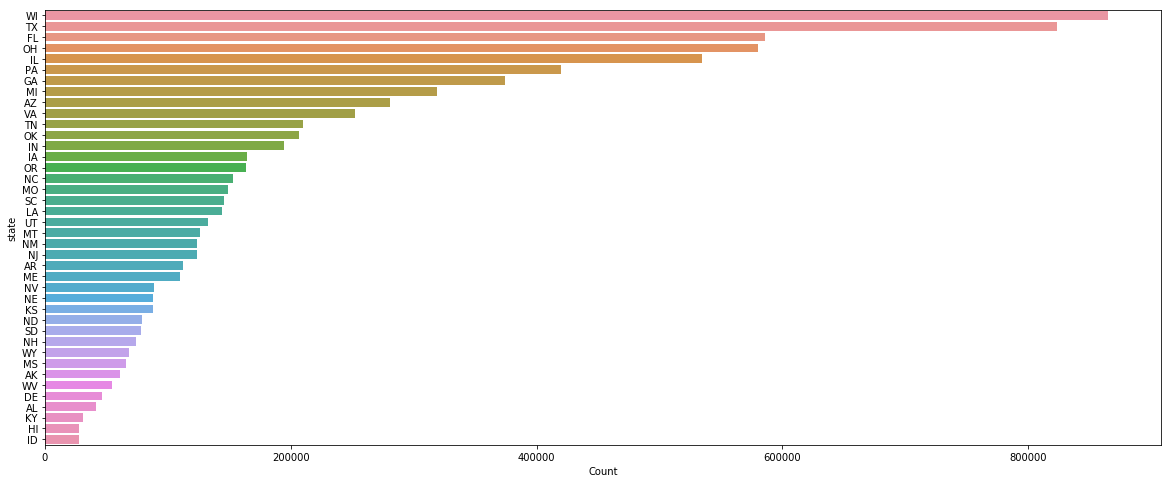

In [14]:
plt.subplots(figsize = (20, 8))
sns.barplot(y = df.state,x=df.Count)
plt.show()

In [15]:
data = dict(type = 'choropleth',
            locations = df['state'],
            locationmode = 'USA-states',
            colorscale = 'mint',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
            z = df['Count'],
            colorbar = {'title':'No. of Benefit Plans'})

layout = dict(title = 'Benefit Plan spread across States',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

Now we are in a much better condition to draw conclusion that state WI is larger consumer of healthcare services. We may have to consider the current population of each state and above stats (graph) to decide our strategy to cover more people accordingly.

Lets have a one more look at which benefit plan is consumed more by the population of the respective state.

## 2.2 Include Census Data

State population estimates are available from [census.gov](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html) for the years 2014 through 2018, so only our most relevant data (2019) is out for these particular insights.

In [16]:
census = pd.read_csv('data/census-gov.csv')

census.columns = census.iloc[2,:]
census.drop([0,1,2], inplace = True)
census.drop(['2010','2011','2012','2013'], axis = 1, inplace = True)
census.replace(',','',inplace = True, regex = True)
census = census.iloc[:56,:].reset_index()
census.loc[:,['2014','2015','2016','2017','2018']] = census.loc[:,['2014','2015','2016','2017','2018']].astype('int')
census.drop(['index'], axis = 1, inplace = True)
census.columns = ['state','name','census','estimate','2014','2015','2016','2017','2018']
census.tail()

,state,name,census,estimate,2014,2015,2016,2017,2018
51,VA,.Virginia,8001024,8001055,8312076,8362907,8410946,8465207,8517685
52,WA,.Washington,6724540,6724540,7052439,7163543,7294680,7425432,7535591
53,WV,.West Virginia,1852994,1853001,1849467,1841996,1830929,1817048,1805832
54,WI,.Wisconsin,5686986,5687282,5751974,5761406,5772958,5792051,5813568
55,WY,.Wyoming,563626,563773,582548,585668,584290,578934,577737


In [17]:
merged = pd.merge(df, census, on = 'state')

In [18]:
years = [2014, 2015, 2016, 2017, 2018]
one_year_dfs = []

for yr in years:

    CSB = CostShare_df[CostShare_df.BusinessYear == yr]
    census_year = census.loc[:,['state',str(yr)]]
    
    CSB = CSB[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
    
    merged_year = pd.merge(CSB, census_year, left_on = 'StateCode', right_on = 'state')
    merged_year['portion'] = merged_year.BenefitName / merged_year[str(yr)]
    merged_year.columns = ['count','state','population','portion']
    merged_year['year'] = str(yr)
    one_year_dfs.append(merged_year)

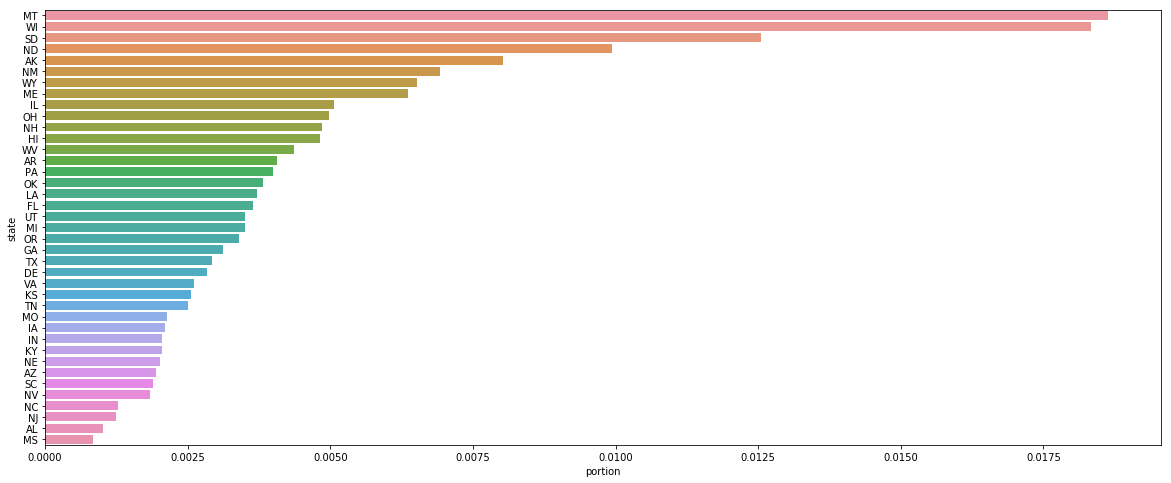

In [19]:
a = one_year_dfs[4].sort_values('portion', ascending = False)
# where 0, 1, 2, 3, and 4 correlate with 2014, 15, 16, 17, and 18, respectively

plt.subplots(figsize = (20,8))
sns.barplot(y = a.state, x = a.portion)
plt.show()

In [20]:
data = dict(type = 'choropleth',
            locations = a['state'],
            locationmode = 'USA-states',
            colorscale = 'mint',
            text = a['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
            z = a['portion'],
            colorbar = {'title':'Plans as portion of population'})

layout = dict(title = 'Benefit Plans relative to Population across States',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

Once we factor in population, we are able to draw more insightful conclusions: yes, Wisconsin still looks to be a big consumer of Marketplace Benefit Plans, but we also have new insights about our northern states, Montana and the Dakotas. We are also able to clarify our assessment of Texas--yes, Texas is big purchaser of benefit plans, but relative the its population, it is no different than most other states.

# 3 Subsetting

In [21]:
CostShare_df[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                         
                   count unique                        top   freq
BusinessYear                                                     
2014             1164869    496  Major Dental Care - Child  18719
2015             2079286    517        Orthodontia - Adult  31269
2016             1804253    429        Orthodontia - Adult  27389
2017             1324275    281        Orthodontia - Adult  21371
2018              829652    252        Orthodontia - Child  13857
2019             1011518    244  Major Dental Care - Adult  16399

## 3.1 Establish BenefitName Subset

In [27]:
benefit = 'Infusion Therapy'
year = 2019

sub_df = CostShare_df[CostShare_df.BenefitName == benefit]
len(sub_df)

110071

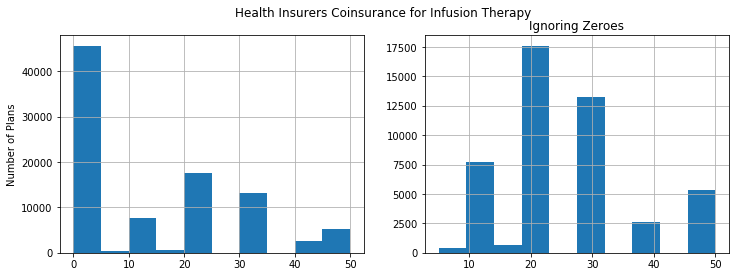

In [28]:
plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
plt.subplot(121)
sub_df.CoinsInnTier1.hist()
plt.ylabel('Number of Plans')


plt.subplot(122)
not_zero = sub_df[sub_df.CoinsInnTier1 > 0]
not_zero.CoinsInnTier1.hist()
plt.title('Ignoring Zeroes')
plt.suptitle('Health Insurers Coinsurance for {}'.format(benefit))

plt.show()

In [29]:
not_zero_yr = not_zero[not_zero.BusinessYear == year]
map_df = not_zero_yr[['StateCode','CoinsInnTier1']].groupby('StateCode').mean()

benefit_year = sub_df[sub_df.BusinessYear == year]
non_zero_portion = len(not_zero_yr)/len(benefit_year)

print(round(non_zero_portion*100,2),'% of plans have a non-zero Coinsurance structure.')

25.28 % of plans have a non-zero Coinsurance structure.


In [32]:
data = dict(type = 'choropleth',
            locations = map_df.index,
            locationmode = 'USA-states',
            colorscale = 'mint',
            text = map_df.index,
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
            z = map_df['CoinsInnTier1'],
            colorbar = {'title':'Average Coinsurance Portion'})

layout = dict(title = 'Average Coinsurance Percentage for "{}" by State: {}'.format(benefit,year),
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

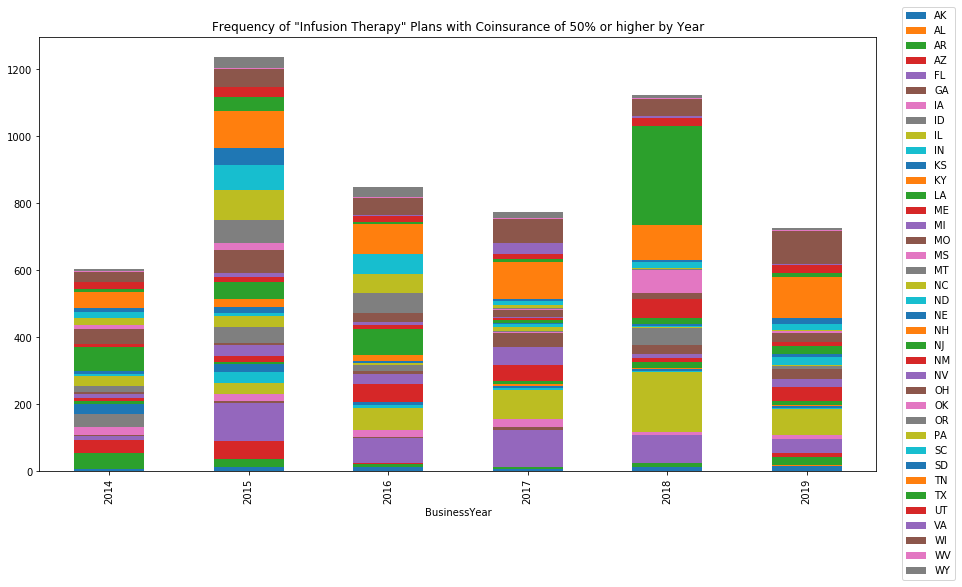

In [33]:
coins = 50

high_co = sub_df[sub_df.CoinsInnTier1 >= coins]

temp = high_co[['BusinessYear','StateCode','CoinsInnTier1']].set_index('BusinessYear')
count_df = temp.groupby(['BusinessYear','StateCode']).count().reset_index()
pivot_df = count_df.pivot(index='BusinessYear', columns='StateCode', values='CoinsInnTier1')

pivot_df.plot.bar(stacked = True, figsize = (15, 8))
plt.title('Frequency of "{}" Plans with Coinsurance of {}% or higher by Year'.format(benefit, coins))
plt.legend(bbox_to_anchor=(1.1, 1.08))

plt.show()